In [178]:
import numpy as np
import pandas as pd
import math
with open("onlyhash.data","rb") as f:   
    data=[line.split() for line in f]
data=np.array(data)   
user=[data[i][0] for i in range(len(data))]
meme = [data[i][2] for i in range(len(data))]
date= [data[i][1] for i in range(len(data))]


def system_entropy(meme):
    s=np.array([[x,meme.count(x)] for x in set(meme)])
    s=s[:,1].astype(np.int)
    s = s.tolist()
    N=len(meme)
    s=[(x/N)*(math.log(x)/N) for x in s]
    result= -sum(s)
    return result
    
def user_entropy(user,meme):
    #total_user=np.array([[x,meme.count(x)] for x in set(meme)])
    index=[]
    entrop=0
    for i in set(user):
        index = np.where(np.array(user)==i)[0]
        index=index.astype(np.int).tolist()
        memes=[meme[j] for j in index]
        s=np.array([[x,memes.count(x)] for x in set(memes)])
        s=s[:,1].astype(np.int)
        s = s.tolist()
        n=len(memes)
        s=[(x/n)* (math.log(x)/n) for x in s]
        result= -sum(s)
        entrop= entrop+result
    average = entrop/len(user)  
    return average





In [179]:
system_ent=[]
average_us_ent=[]
for i in set(date):
    index= np.where(np.array(date)==i)[0]
    index = index.astype(np.int).tolist()
    
    me=[meme[j] for j in index]
    
    us=[user[k] for k in index]
    
    system_ent.append(system_entropy(me))
    
    average_us_ent.append(user_entropy(us,me))
print (system_ent)
print ("___________________________________________________________________________________________________")
print (average_us_ent)
    

[-0.002558682326347542, -0.00023262853483803272, -0.0006308699584002271, -0.0026238604431198147, -0.00012554468020615364, -0.0031152950744828996, -0.00021940346179093518, -0.0005147143671690471, -0.0001660687006847036, -0.01809208547966132, -0.0, -0.004241222118023383, -0.0, -0.0017168276013686127, -0.0009320215713746201, -0.009359669796202667, -0.0, -0.0006174004685456511, -0.00032954461860000437, -0.02031131280680195, -0.00013215119337044366, -0.00391878510050475, -0.00041487003009104236, -0.00926768812668583, -0.004024199470957219, -0.005074336843875354, -0.0051657815423026545, -0.0, -0.0014473595186001997, -0.00016924984516715656, -0.004814955246171409, -0.0008477695073359573, -0.0009053232087654559, -0.005704915066336998, -0.0, -0.0, -0.0, -0.0, -0.0009816284901692947, -0.013331026951429898, -0.0, -0.0009867738441850173, -0.003623347466730776, -0.0010099849624144541, -0.00016640572897113845, -0.0, -0.0, -0.00016583384448143134, -0.0013955694837803644, -0.0007023975714407372, -0.00

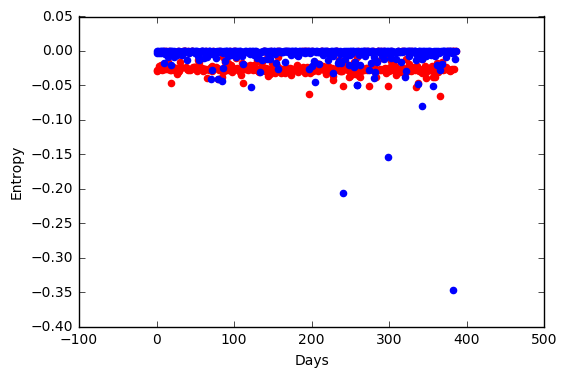

In [181]:
x=[]
for i in range(0, len(set(date))):
    x.append(i)
    
from matplotlib import pyplot as plt
plt.scatter(x,average_us_ent,color='red')
plt.scatter(x,system_ent,color='blue')
plt.ylabel('Entropy')
plt.xlabel('Days')
plt.show()



In [ ]:
The result regarding "average user entropy" is compatible to the graph showed in the paper. It means that the attention 
of a user is limited and bound but not independent of the system entropy. As we can notice from our scatter plot, 
changes in system entropy effect the average user entropy as well. 